#RAVITEJA Y S - 213010042
#SHREYAS G S - 213010040

#PCA: 
a. Visualize the data from the file DataPCA.csv.

b. Train PCA.

c. Plot the variance explained versus PCA dimensions. 

d. Reconstruct the data with various numbers of PCA dimensions, and compute the 
MSE. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Imported all the required libraries and uploaded the data of PCA 

In [ ]:
raw_data = pd.read_csv('/content/DataPCA.csv')

In [ ]:
raw_data #Observing the csv file and converting into the pandas dataframe

,x1,x2,x3,x4,x5,x6,x7
0,0.840261,-1.088160,4.861744,4.273055,4.312457,-0.137834,0.076453
1,1.320591,-1.174113,5.247360,3.295027,4.283410,-0.363759,-0.170605
2,1.537909,-1.175882,5.556251,3.394183,3.971574,-0.888398,0.080617
3,0.363552,-1.130608,4.329890,5.547488,4.539732,0.342330,0.251953
4,1.567938,-1.114719,5.542104,2.493071,4.156157,-0.609694,-0.291367
...,...,...,...,...,...,...,...
185,0.894296,-1.270097,4.618647,4.005702,4.634847,0.156118,-0.215169
186,0.926559,-1.203508,4.766199,3.907673,4.538084,0.073321,-0.197924
187,1.678706,-1.227245,5.613809,2.864530,4.046335,-0.906304,-0.099063
188,1.693254,-1.323340,5.470576,3.023584,4.208331,-0.693895,-0.189082


In [ ]:
print(raw_data.columns)

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'], dtype='object')


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(raw_data)
scaled_data = scaler.transform(raw_data)

Here we have Scaled the data using the MinMax scaler function and used the scaled data to train the PCA as below shown

In [ ]:
scaled_data

array([[0.35455399, 0.49945005, 0.30938639, ..., 0.57501163, 0.6517943 ,
        0.657051  ],
       [0.54080391, 0.43299703, 0.44282344, ..., 0.5584146 , 0.56993324,
        0.46894499],
       [0.62507001, 0.43162939, 0.54971084, ..., 0.3802371 , 0.379837  ,
        0.66022116],
       ...,
       [0.67966454, 0.39191843, 0.56962793, ..., 0.42295373, 0.37334909,
        0.52341602],
       [0.68530572, 0.31762467, 0.52006416, ..., 0.51551567, 0.45031264,
        0.45487698],
       [0.72908957, 0.29925142, 0.54466395, ..., 0.5338995 , 0.4514196 ,
        0.42936078]])

Performing the Data Visualizing using the distribution plot

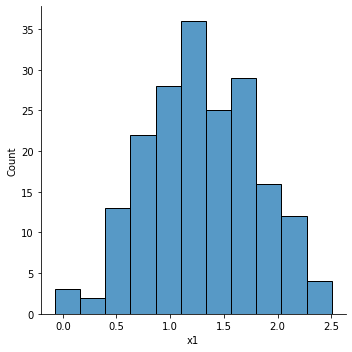

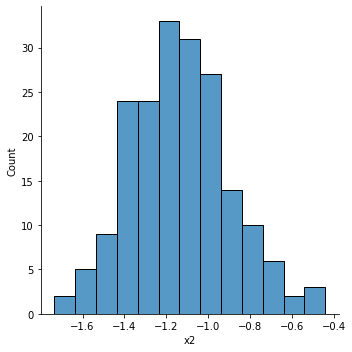

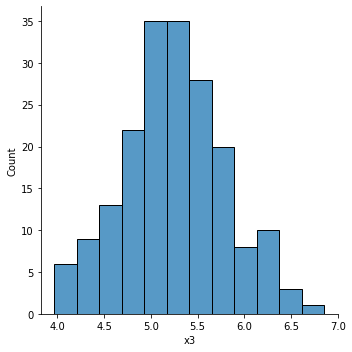

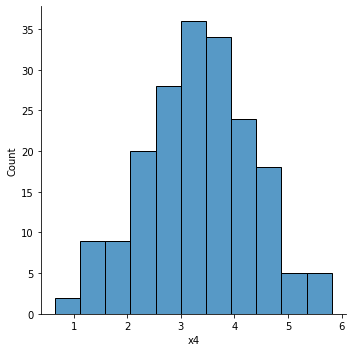

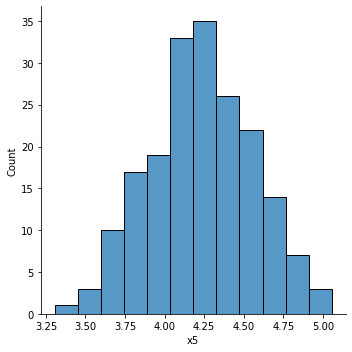

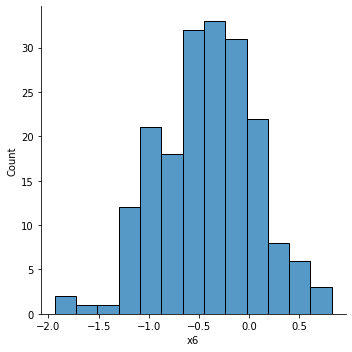

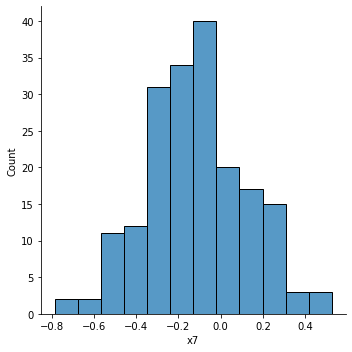

In [ ]:
for column in raw_data:
  sns.displot(x=column, data=raw_data)

As we can see that the distribution plot for all the features of the data, it is clear that it is a normal distributed data and therefor we dont have to do the feature transformation and other stuff.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()

Here we are training the PCA 

In [ ]:
pca.fit(scaled_data)

PCA()

In [ ]:
xpca = pca.transform(scaled_data)

In [ ]:
scaled_data.shape

(190, 7)

In [ ]:
xpca.shape

(190, 7)

In [ ]:
exp_var_pca = pca.explained_variance_ratio_
print(exp_var_pca)

[6.20498990e-01 3.11580884e-01 6.15365847e-02 6.14070319e-03
 2.18099918e-04 2.08502487e-05 3.88741922e-06]


The above shows the Explained variance ratio for each variable of the data which is nothing but the ratio of variance (eigenvalue / total eigenvalues) as asked in the assignment question.

In [ ]:
xpca

array([[-3.07272032e-01,  1.45011651e-01, -3.00733496e-02, ...,
        -9.17969209e-05, -2.39460853e-03, -1.64618276e-04],
       [-5.11200393e-03, -6.01388548e-02,  1.03893707e-02, ...,
         1.76163972e-03,  2.97043663e-03,  2.66589205e-03],
       [ 1.89640670e-01,  1.41640599e-01, -2.00688819e-01, ...,
         7.87530538e-03,  1.22487196e-04,  1.27765858e-03],
       ...,
       [ 2.77418877e-01, -1.14942199e-02, -1.36266874e-01, ...,
         3.19906689e-03,  2.37547720e-03, -5.59445587e-05],
       [ 1.80259995e-01, -1.44381527e-01, -1.22115030e-01, ...,
         9.93486899e-03, -1.08589996e-03, -1.45386146e-04],
       [ 2.25949628e-01, -1.95326206e-01, -1.15315384e-01, ...,
        -1.15553851e-02, -7.78567201e-04,  1.40616646e-03]])

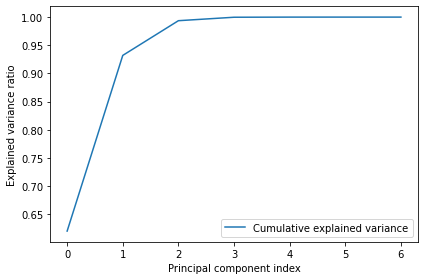

[0.62049899 0.93207987 0.99361646 0.99975716 0.99997526 0.99999611
 1.        ]


In [ ]:
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cumsum = np.cumsum(exp_var_pca)
# Creating the visualization plot
plt.plot(range(0,len(cumsum)),cumsum,label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
print(cumsum)

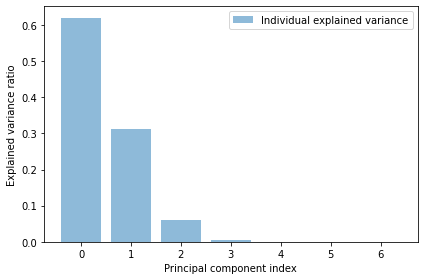

In [ ]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Here,
explained_variance_ratio_ method of PCA is used to get the ratio of variance (eigenvalue / total eigenvalues).

Bar chart is used to represent individual explained variances.

Step plot is used to represent the variance explained by different principal components.

Data needs to be scaled before applying PCA technique.

So as we can see that from the Individual Explained Variance, the individual features experienced variance is plotted and the first feature has almost more than 60% of variance and the next variable has 30% of variance and so on. So based on this we can take 3 or 4 components in PCA and train our model for the data which can be used for the required model.

#Reconstructing the data with various numbers of PCA dimensions, and computing the MSE.

In [ ]:
X_projected = pca.inverse_transform(xpca)

In [ ]:
loss = np.sum((xpca - X_projected) ** 2, axis=1).mean()
print(loss)

2.0635619373665985


As I have referred in the below references from the stack overflow platform, I used the concept from the platform and tried to apply here. So here the pca.inverse_transform obtains the projection onto components in signal space that we are interested in and the loss formula mentioned in the below cell gives the formula for the MSE loss. So based on that I'm getting the value of 2.06 as the loss.

#REFERENCES:

This blog was refered to plot of Explained varinace and the PCA Dimensions https://vitalflux.com/pca-explained-variance-concept-python-example/#:~:text=Explained%20variance%20is%20calculated%20as,decomposition%20PCA%20class.

https://towardsdatascience.com/principal-component-analysis-part-1-the-different-formulations-6508f63a5553#:~:text=In%20the%20Minimum%20Error%20Formulation,data%20points%20and%20their%20projection%20.

This video was referred for understanding the PCA: https://www.youtube.com/watch?v=OFyyWcw2cyM

https://yassineelkhal.medium.com/introduction-to-principal-component-analysis-pca-b918abb5c40e

For the Loss- I have referred this post: https://stackoverflow.com/questions/36566844/pca-projection-and-reconstruction-in-scikit-learn